In [1]:
#Train test splitting
#Numpy array vs pd dataframe

In [2]:
from sklearn.datasets import load_iris

irisData = load_iris()

In [4]:
from sklearn.model_selection import train_test_split
X, y = irisData["data"], irisData["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
X_train.shape,X.shape,X_test.shape

((120, 4), (150, 4), (30, 4))

In [8]:
import pandas as pd
import numpy as np

dfData = pd.DataFrame(np.c_[irisData["data"],irisData["target"]],columns = irisData["feature_names"]+["target"])

X_train, X_test, y_train, y_test = train_test_split(dfData[irisData["feature_names"]], 
                                                    dfData["target"], 
                                                    test_size=0.2, 
                                                    random_state=0)

In [9]:
dfData.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [11]:
print(X_train.head())
print()
print(y_train.head())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
137                6.4               3.1                5.5               1.8
84                 5.4               3.0                4.5               1.5
27                 5.2               3.5                1.5               0.2
127                6.1               3.0                4.9               1.8
132                6.4               2.8                5.6               2.2

137    2.0
84     1.0
27     0.0
127    2.0
132    2.0
Name: target, dtype: float64


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in stratSplit.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [13]:
for train_index, test_index in stratSplit.split(dfData[irisData["feature_names"]], dfData["target"]):
    X_train = dfData[irisData["feature_names"]].iloc[train_index]
    X_test = dfData[irisData["feature_names"]].iloc[test_index]
    y_train = dfData["target"].iloc[train_index]
    y_test = dfData["target"].iloc[test_index]

In [14]:
print(X_train.head())
print(y_train.head())

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
45                4.8               3.0                1.4               0.3
1                 4.9               3.0                1.4               0.2
38                4.4               3.0                1.3               0.2
7                 5.0               3.4                1.5               0.2
82                5.8               2.7                3.9               1.2
45    0.0
1     0.0
38    0.0
7     0.0
82    1.0
Name: target, dtype: float64


In [15]:
numZeros = []
numZerosStrat = []
expectedZeros = 0.2*list(y).count(0)

#Removing random states
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for i in range(100):
    _,_,_,y_test_temp = train_test_split(X, y, test_size=0.2)
    numZeros.append(list(y_test_temp).count(0))
    for train_index, test_index in stratSplit.split(X, y):
        _, y_test_temp_strat = y[train_index], y[test_index]
        
    numZerosStrat.append(list(y_test_temp_strat).count(0))

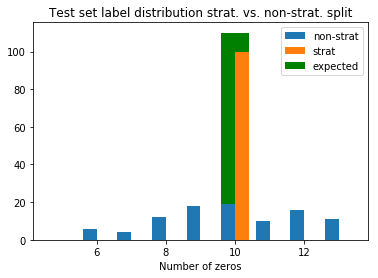

In [17]:
import matplotlib.pyplot as plt

plt.bar(expectedZeros,width=0.8,color="green",height=110,label="expected")
plt.hist([numZeros,numZerosStrat],label=["non-strat","strat"],bins=np.arange(5,15,1),align="left")
plt.xlabel("Number of zeros")
plt.title("Test set label distribution strat. vs. non-strat. split")
plt.legend()
plt.show()